## Question 6

Use the diabetes dataset from Kaggle (https://www.kaggle.com/c/diabetes-classification/data). You should use the `train.csv` dataset for your training and testing. Explain  the  attributes  and  the  target. Perform exploratory data  analysis and set-up  a decision tree. Set up a SVM classifier and compare the performance of the decision tree with the SVM classifier. You are required to perform optimization wherever possible. Deploy your trained  and tested  algorithms on the dataset in `test.csv`. Compare if the decision tree and SVM classifiers provide the same results for the dataset in `test.csv`.

In [1]:
import pandas as pd
import numpy as np

train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

## Data Exploration

### Getting a sense of the data

Let's get a sense of both datasets,

In [2]:
train_dataset.head(5)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [3]:
test_dataset.head(5)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


We notice that for the `test.csv` dataset, there is no `target` column.

From the Kaggle, the features are as follows,

| Feature | Description |
| ------ | ----------- |
| `no_times_pregnant` | Number of times pregnant |
| `glucose_concentration` | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| `blood_pressure` | Diastolic blood pressure (mm Hg) |
| `skin_fold_thickness` | Triceps skin fold thickness (mm) |
| `serum_insulin` | 2-Hour serum insulin (mu U/ml) |
| `bmi` | Body mass index (weight in kg/(height in m)^2) | 
| `diabetes pedigree` | Diabetes pedigree function |
| `age` | Age (years) |

And for the target variable,

| Target | Description |
| --- | --- |
| `diabetes` | The target variable with classes `0` or `1` |

The data types of each column in both `train.csv` and `test.csv` are,

In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [5]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   154 non-null    int64  
 1   no_times_pregnant      154 non-null    int64  
 2   glucose_concentration  154 non-null    int64  
 3   blood_pressure         154 non-null    int64  
 4   skin_fold_thickness    154 non-null    int64  
 5   serum_insulin          154 non-null    int64  
 6   bmi                    154 non-null    float64
 7   diabetes pedigree      154 non-null    float64
 8   age                    154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


### Dropping unwanted column

From observation, the column `p_id` seems to be an identifier value of the subjects. We can verify this with,

In [8]:
train_dataset['p_id'].unique().shape[0]

(614,)

Since there are `614` rows, this implies that the values of each `p_id` is unique. Therefore, we would like to drop the `p_id` column,

In [6]:
train_dataset = train_dataset.drop(['p_id'], axis=1)
test_dataset = test_dataset.drop(['p_id'], axis=1)

### Finding missing data

Let's find any missing data records we have to clean up,

In [7]:
train_dataset[train_dataset.isnull().any(axis=1)]

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes


In [8]:
train_dataset.isnull().values.any()

False

In [9]:
test_dataset[test_dataset.isnull().any(axis=1)]

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age


In [10]:
test_dataset.isnull().values.any()

False

We find that there are no missing values to be cleaned in the given dataset.

### Formatting the data

Let's split up the train data into $\mathbf{X}$ and $\mathbf{y}$ values, 

In [11]:
X_train = train_dataset.iloc[:,:-1]
y_train = train_dataset.iloc[:,-1]
X_test = test_dataset

In [12]:
X_train.shape

(614, 8)

In [13]:
y_train.shape

(614,)

In [14]:
X_test.shape

(154, 8)

Let's get a sense of the number of classes in the train dataset and its distribution,

In [15]:
y_train.value_counts().to_frame('Count')

,Count
0,400
1,214


There are `2` classes, implying binary classification.

### Statistical analysis

Let's display some descriptive statistics to get a sense of the train dataset variance for each of the features,

In [16]:
X_train.describe()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733
std,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000
50%,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000
max,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000


### Data Visualization

Let's visualize the dataset using pair plots,

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


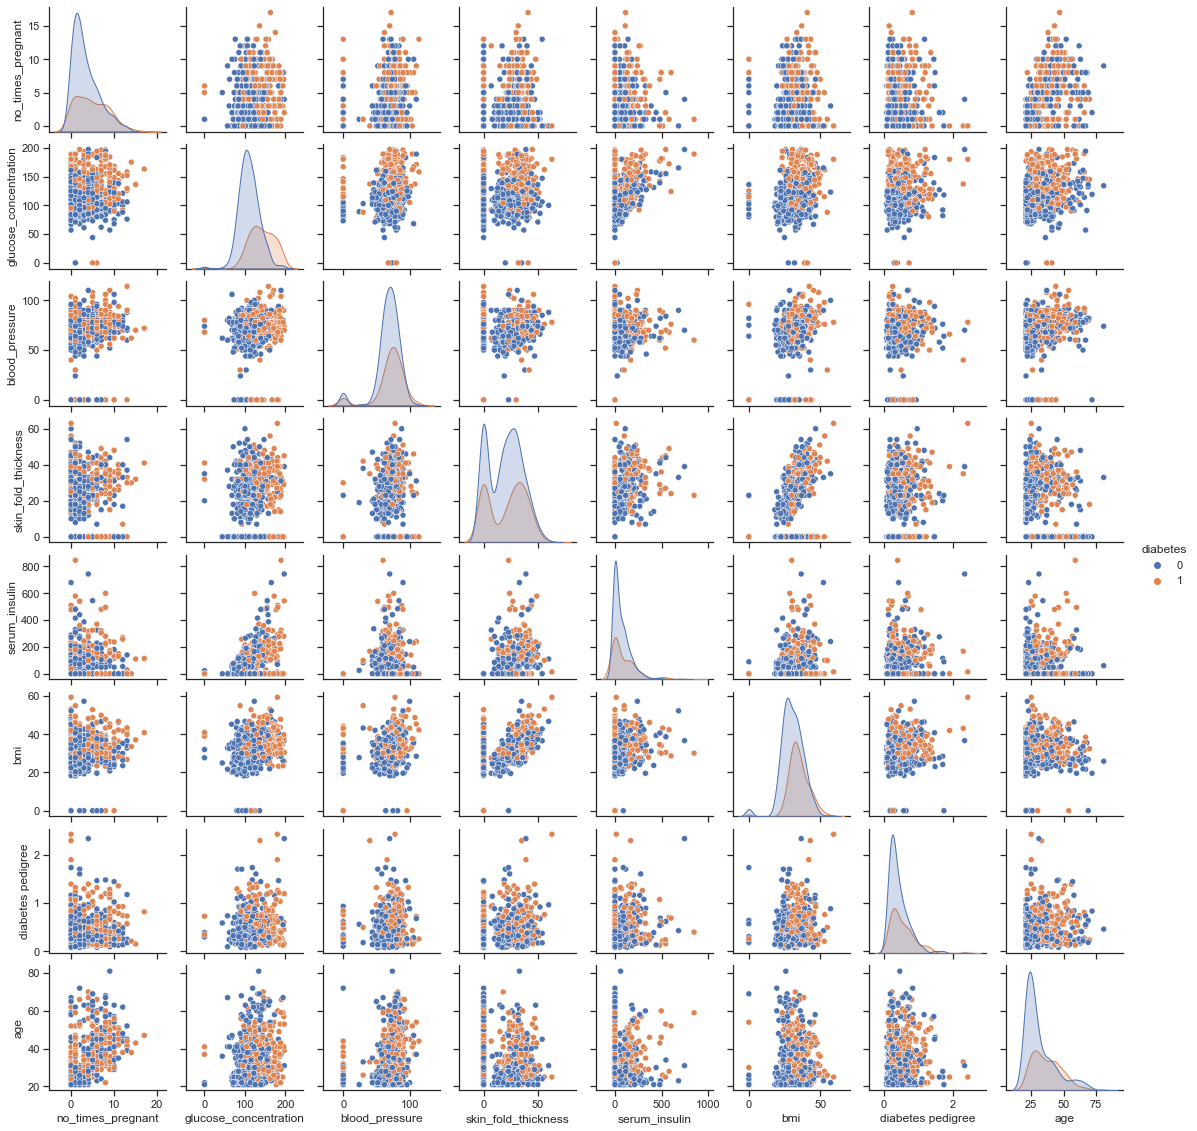

In [17]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.pairplot(train_dataset, hue="diabetes", size=2.0)

## Standardizing the dataset

We will standardize the data as part of the pre-processing step.

Although Decision Trees are scale invariant by the nature of its algorithm (e.g. the prediction stays constant even if the scales of the feature have changed), SVM is not scale invariant and hence it is advisable for features to be in $(0, 1)$ or $(-1,+1)$ interval. 

In our case, we will use standard scaler to standardize the data.

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Picking the optimal parameters for Decision Tree and SVM classifiers

We would like to pick the optimal hyperparameters for the Decision Tree and the SVM classifier that we would use for the model.

### Decision Tree classifier hyperparameter selection

For the Decision Tree classifier, let's find the optimal max-depth hyperparameter,

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = []
scores_range = (2, 16)

for d in range(*scores_range):
    dt = DecisionTreeClassifier(max_depth=d, criterion = 'gini')
    results = cross_val_score(dt, X_train, y_train, cv=5)
    scores.append((d, results.min(), results.max(), results.mean(), results.std()))

Plotting the cross-validation min, max and average scores across all max-depth values,

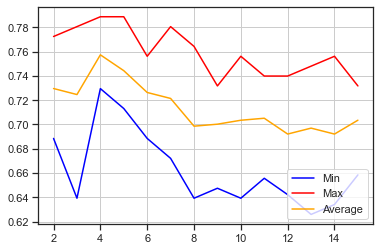

In [20]:
from matplotlib import pyplot

pyplot.grid()
pyplot.plot(list(range(*scores_range)), [item[1] for item in scores], '-', color='blue')
pyplot.plot(list(range(*scores_range)), [item[2] for item in scores], '-', color='red')
pyplot.plot(list(range(*scores_range)), [item[3] for item in scores], '-', color='orange')
pyplot.legend(['Min', 'Max', 'Average'], loc='lower right')

Comparing its standard deviation,

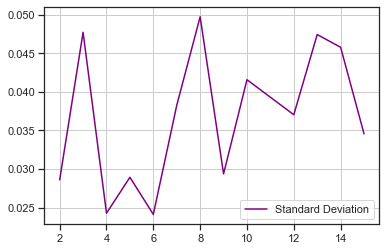

In [21]:
pyplot.grid()
pyplot.plot(list(range(*scores_range)), [item[4] for item in scores], '-', color='purple')
pyplot.legend(['Standard Deviation'], loc='lower right')

Displaying the top `10` scores,

In [22]:
df_scores = pd.DataFrame(scores, columns=['max-depth', 'min-score', 'max-score', 'average', 'std'])
df_scores = df_scores.sort_values(by=['average', 'std'], ascending=[False, True])
df_scores.head(10)

,max-depth,min-score,max-score,average,std
2,4,0.729508,0.788618,0.757284,0.024279
3,5,0.713115,0.788618,0.744249,0.028935
0,2,0.688525,0.772358,0.729575,0.028598
4,6,0.688525,0.756098,0.726323,0.024123
1,3,0.639344,0.780488,0.724617,0.047720
5,7,0.672131,0.780488,0.721418,0.038253
9,11,0.655738,0.739837,0.705131,0.039309
13,15,0.658537,0.731707,0.703519,0.034566
8,10,0.639344,0.756098,0.703479,0.041581
7,9,0.647541,0.731707,0.700240,0.029374


Based on the results above, we will choose a max-depth of `4` as it is the most optimal choice.

### SVM classifier hyperparameters selection

For the SVM classifier, let's find the optimal hyperparameters using grid search, given that it is a combination of hyperparameters we would like to optimize,

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()

parameters = [
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['poly'], 'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]

gs = GridSearchCV(estimator=svm, param_grid=parameters, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                          'kernel': ['poly']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['sigmoid']}])

Displaying the top `10` scores,

In [24]:
df_results = pd.DataFrame([
    [gs.cv_results_['rank_test_score'][i], 
     gs.cv_results_['mean_test_score'][i], 
     gs.cv_results_['std_test_score'][i], p
    ] for i, p in enumerate(gs.cv_results_['params'])
], columns=['rank', 'mean', 'std', 'hyperparams'])
df_results = df_results.sort_values(by=['mean', 'std'], ascending=[False, True])
df_results.head(10)

,rank,mean,std,hyperparams
32,1,0.780128,0.022425,"{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}"
13,2,0.776903,0.012726,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}"
31,3,0.776903,0.016361,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}"
4,4,0.776876,0.003747,"{'C': 0.25, 'gamma': 0.1, 'kernel': 'rbf'}"
22,5,0.775263,0.017267,"{'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'}"
23,6,0.775250,0.020878,"{'C': 0.75, 'gamma': 0.2, 'kernel': 'rbf'}"
15,7,0.775237,0.021641,"{'C': 0.5, 'gamma': 0.3, 'kernel': 'rbf'}"
0,8,0.773597,0.019037,"{'C': 0.25, 'kernel': 'linear'}"
1,8,0.773597,0.019037,"{'C': 0.5, 'kernel': 'linear'}"
2,8,0.773597,0.019037,"{'C': 0.75, 'kernel': 'linear'}"


Based on the results, above, the best hyperparameters would be when $C=1$, $\gamma = 0.2$ and utilises the Radial Basis Function (RBF) kernel.

## Training the Models based on selected hyperparameter(s)

We would start training the models based on the selected hyperparameters.

### Splitting the train dataset further to train and validation dataset

We would like to split the datasets to determine the performance of both models.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Training the Decision Tree classifier

In [26]:
dt = DecisionTreeClassifier(max_depth=4, criterion='gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Visualizing the tree,

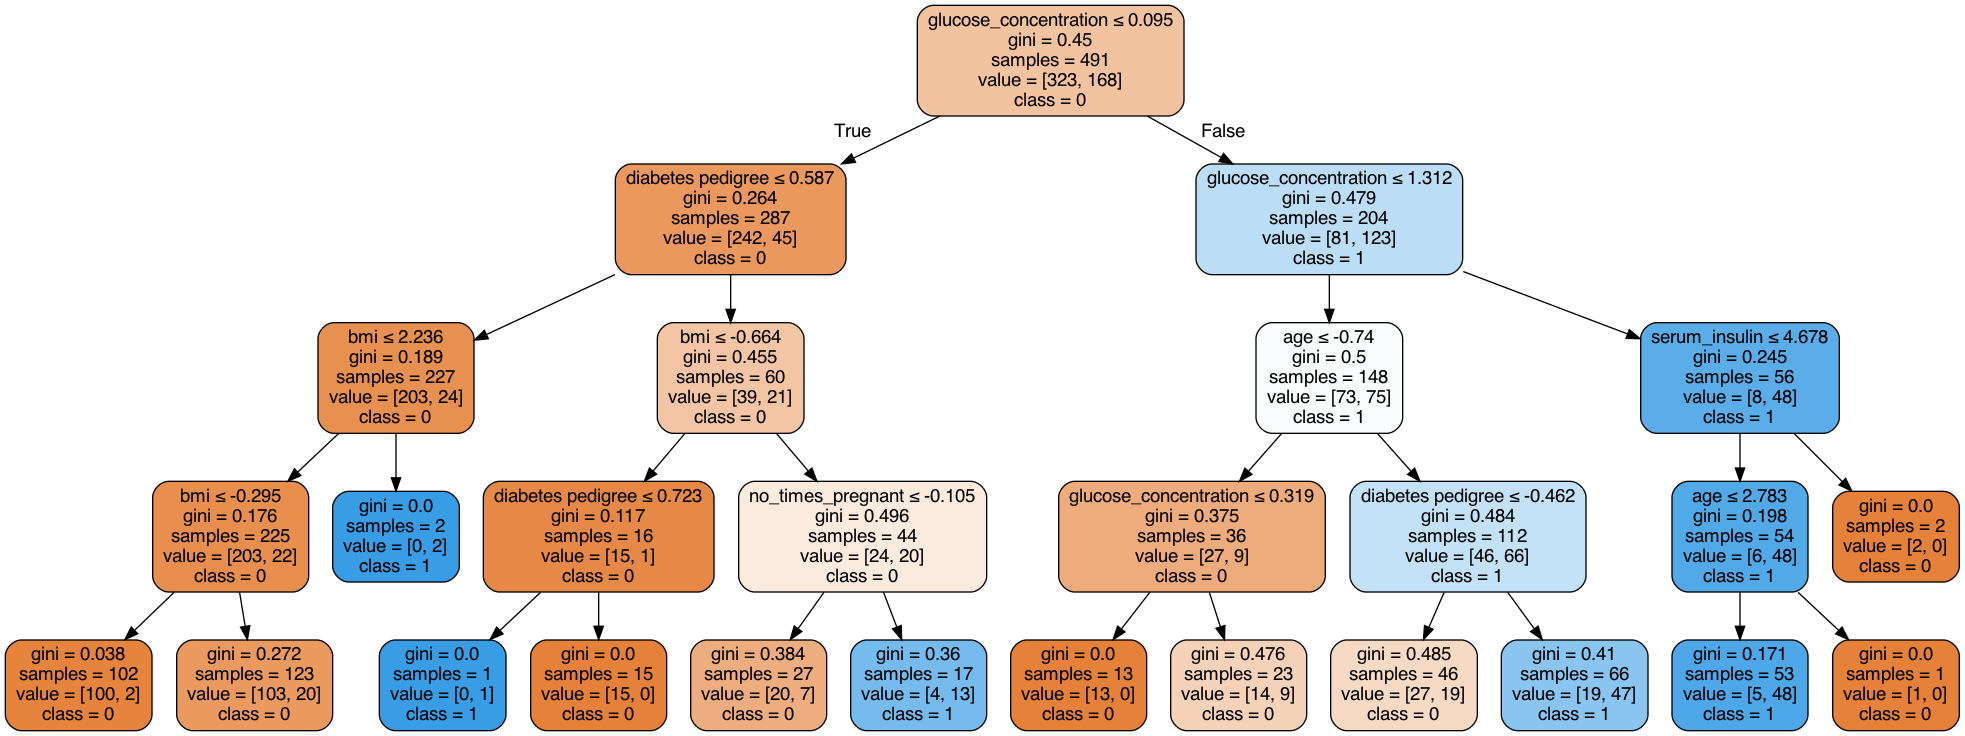

In [30]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                    filled=True, 
                    rounded=True,
                    special_characters=True,
                    feature_names=list(train_dataset.columns[:-1]),
                    class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The score results in,

In [31]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

y_pred = dt.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        77
           1       0.74      0.54      0.62        46

    accuracy                           0.76       123
   macro avg       0.75      0.71      0.72       123
weighted avg       0.75      0.76      0.75       123



In [32]:
accuracy_score(y_pred, y_val)

0.7560975609756098

In [33]:
f1_score(y_pred, y_val)

0.625

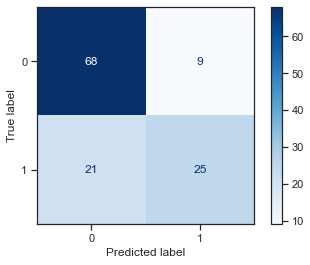

In [34]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

disp = plot_confusion_matrix(dt, X_val, y_val, display_labels=['0', '1'], cmap=plt.cm.Blues)
plt.show()

### Training the SVM classifier

In [35]:
svm = SVC(C=1, gamma=0.2, kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.2)

The score results in,

In [36]:
y_pred = svm.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        77
           1       0.76      0.54      0.63        46

    accuracy                           0.76       123
   macro avg       0.76      0.72      0.73       123
weighted avg       0.76      0.76      0.75       123



In [37]:
accuracy_score(y_pred, y_val)

0.7642276422764228

In [38]:
f1_score(y_pred, y_val)

0.6329113924050633

Based on the above results, we find that the SVM classifier yields better overall results than the Decision Tree classifier. This is because the SVM uses kernel trick to solve non-linear problems whereas decision trees derive hyper-rectangles in input space to solve the problem.

## Comparing the results using the test dataset

### Testing with the Decision Tree classifier

Training the Decision Tree classifier,

In [42]:
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

Displaying the predicted `diabetes` column value for each row,

In [49]:
dt_df = test_dataset.copy()
dt_df['diabetes'] = pd.Series(y_pred, index=dt_df.index)
dt_df.head(5)

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,12,140,85,33,0,37.4,0.244,41,0
1,6,102,90,39,0,35.7,0.674,28,1
2,7,97,76,32,91,40.9,0.871,32,1
3,7,179,95,31,0,34.2,0.164,60,1
4,6,87,80,0,0,23.2,0.084,32,0


Displaying the total count of predicted classes,

In [55]:
dt_df['diabetes'].value_counts().to_frame('Count')

,Count
0,98
1,56


### Testing with the SVM classifier

Training the SVM classifier,

In [56]:
y_pred = svm.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

Displaying the predicted `diabetes` column value for each row,

In [57]:
dt_svm = test_dataset.copy()
dt_svm['diabetes'] = pd.Series(y_pred, index=dt_svm.index)
dt_svm.head(5)

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,12,140,85,33,0,37.4,0.244,41,1
1,6,102,90,39,0,35.7,0.674,28,0
2,7,97,76,32,91,40.9,0.871,32,0
3,7,179,95,31,0,34.2,0.164,60,1
4,6,87,80,0,0,23.2,0.084,32,0


Displaying the total count of predicted classes,

In [58]:
dt_svm['diabetes'].value_counts().to_frame('Count')

,Count
0,102
1,52


### Concluding the result

As evidently shown, both classifiers do not yield the same result, and the SVM classifier has predicted more diabetes cases than the DT classifier.